# **1. Perkenalan Dataset**


Pada proyek ini, aku menggunakan dataset **Loan Prediction (Credit Risk)**.

* **Sumber**: Dream Housing Finance (via Kaggle/GitHub Mirror).
* **Tujuan**: Memprediksi apakah pengajuan pinjaman nasabah akan **Disetujui (Y)** atau **Ditolak (N)**.
* **Target**: `Loan_Status` (Y/N).
* **Alasan Pemilihan**: Dataset ini merepresentasikan kasus nyata di industri perbankan (Fintech). Tantangan utamanya adalah menangani **banyak data kosong (missing values)** pada fitur demografis dan keuangan, serta tipe data yang beragam.

**Fitur Utama:**
* `Loan_ID`: ID Pinjaman (Akan dihapus).
* `Gender`, `Married`, `Dependents`: Demografi nasabah.
* `Education`, `Self_Employed`: Status pekerjaan/pendidikan.
* `ApplicantIncome`: Pendapatan pemohon.
* `CoapplicantIncome`: Pendapatan pasangan (jika ada).
* `LoanAmount`: Jumlah pinjaman (Sering ada data kosong di sini).
* `Loan_Amount_Term`: Jangka waktu pinjaman.
* `Credit_History`: Riwayat kredit (0.0 = Buruk, 1.0 = Baik).
* `Property_Area`: Lokasi properti (Urban/Semiurban/Rural).
* `Loan_Status`: Target (Y = Approved, N = Rejected).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Config
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("Library siap digunakan!")

Library siap digunakan!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
# URL Raw Dataset Loan Prediction (Link Alternatif Stabil)
# Sumber: Repository Shrikant Temburwar (Versi Standar Kaggle)
url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv"

try:
    df = pd.read_csv(url)
    print("✅ Dataset berhasil dimuat!")

    # Cek 5 data teratas
    display(df.head())

    # Cek dimensi
    print(f"\nDimensi Data: {df.shape[0]} Baris, {df.shape[1]} Kolom")

except Exception as e:
    print(f"❌ Gagal memuat dataset: {e}")

✅ Dataset berhasil dimuat!


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Dimensi Data: 614 Baris, 13 Kolom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Jumlah Data Kosong (Missing Values) ===
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


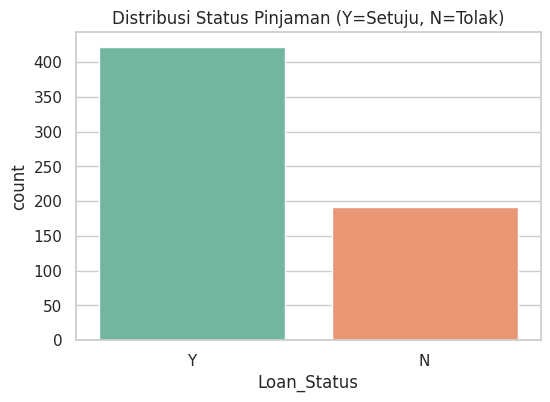

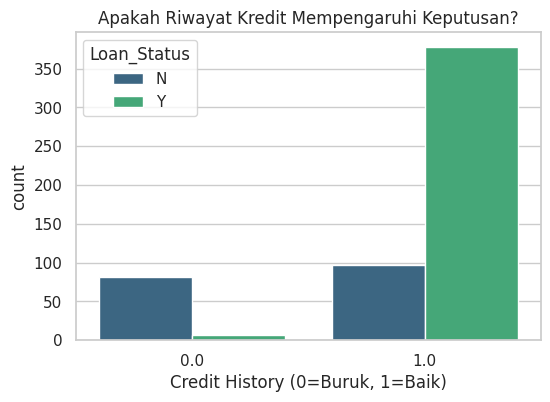

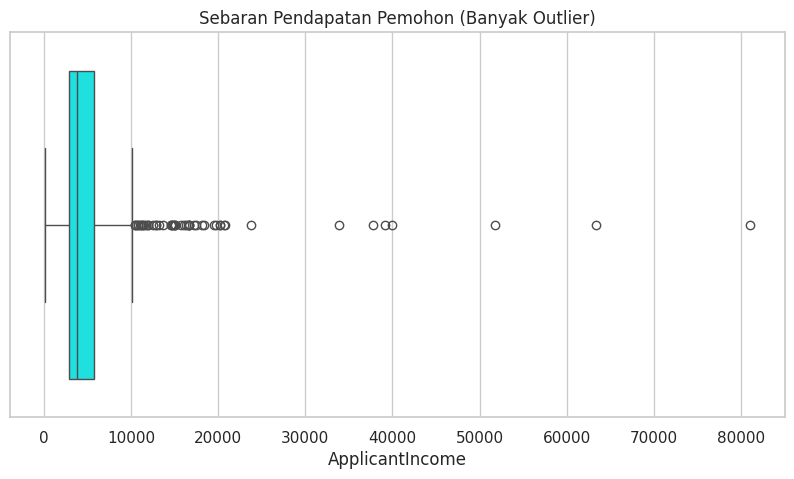

In [ ]:
# Cek Data Kosong
print("=== Jumlah Data Kosong (Missing Values) ===")
print(df.isnull().sum())

# Visualisasi Target (Loan_Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Distribusi Status Pinjaman (Y=Setuju, N=Tolak)')
plt.show()

# Hubungan Riwayat Kredit (Credit_History) vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='viridis')
plt.title('Apakah Riwayat Kredit Mempengaruhi Keputusan?')
plt.xlabel('Credit History (0=Buruk, 1=Baik)')
plt.show()

# Cek Outlier di Pendapatan (ApplicantIncome)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ApplicantIncome'], color='cyan')
plt.title('Sebaran Pendapatan Pemohon (Banyak Outlier)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Persiapan Data
# Buang kolom ID karena tidak berguna untuk prediksi
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Encode Target: Mengubah 'Y' (Yes) jadi 1, dan 'N' (No) jadi 0
le = LabelEncoder()
y = le.fit_transform(y)
print(f"Target Berhasil Di-encode: {le.classes_} -> [0, 1]")

# Kelompokkan Kolom
# Kolom Angka (Numerik)
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Kolom Teks (Kategorikal)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Buat Pipeline

# Pipeline Numerik:
# a. SimpleImputer(median): Kalau ada angka kosong, isi dengan Median.
# b. StandardScaler: Ubah skala angka biar seragam.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline Kategorikal:
# a. SimpleImputer(most_frequent): Kalau ada teks kosong, isi dengan yang Modus.
# b. OneHotEncoder: Ubah teks (misal: Male/Female) jadi angka biner (0/1).
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabung kedua pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split Data (Latih & Uji)
# Bagi 80% buat belajar (Train), 20% buat ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Jalankan Preprocessing
# Fit (pelajari pola) hanya di data Train, lalu Transform (ubah) data Train & Test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Simpan Hasil
# Ambil nama kolom baru hasil OneHotEncoder
ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(ohe_feature_names)

# Jadikan Dataframe lagi
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

print("=== Contoh Data Siap Latih (5 Baris) ===")
display(X_train_df.head())

# Simpan ke CSV buat Training Model
train_set = pd.concat([X_train_df, pd.Series(y_train, name='Loan_Status')], axis=1)
train_set.to_csv('loan_data_train_processed.csv', index=False)

test_set = pd.concat([X_test_df, pd.Series(y_test, name='Loan_Status')], axis=1)
test_set.to_csv('loan_data_test_processed.csv', index=False)

print("\n✅ SUKSES! File 'loan_data_train_processed.csv' berhasil disimpan.")

Target Berhasil Di-encode: ['N' 'Y'] -> [0, 1]
=== Contoh Data Siap Latih (5 Baris) ===


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.352802,-0.563228,-1.131588,0.280691,0.397516,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.343346,-0.563228,-0.592309,0.280691,0.397516,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.339471,0.050405,0.040758,0.280691,-2.515623,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.445963,-0.024953,-0.393010,-2.486768,-2.515623,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,-0.451078,0.234495,0.040758,0.280691,0.397516,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



✅ SUKSES! File 'loan_data_train_processed.csv' berhasil disimpan.
